# Exploring the pydataset 'Breakage Angle of Chocolate Cake'

This notebook investigates the contents of the 'cake' dataset provided in the `pydataset` package.

In [2]:
from pydataset import data


df = data('cake')
# data('cake', show_doc=True)
display(df.head())
# display(df.info())
# display(df.describe())

,replicate,recipe,temperature,angle,temp
1,1,A,175,42,175
2,1,A,185,46,185
3,1,A,195,47,195
4,1,A,205,39,205
5,1,A,215,53,215


In [3]:
df.recipe.astype('category')
df.groupby('recipe')['angle'].mean()

recipe
A    33.122222
B    31.644444
C    31.600000
Name: angle, dtype: float64

We can see that the breakage angle for recipes B and C are nearly identical, while the angle for recipe A is approximately 1.5 degrees greater.

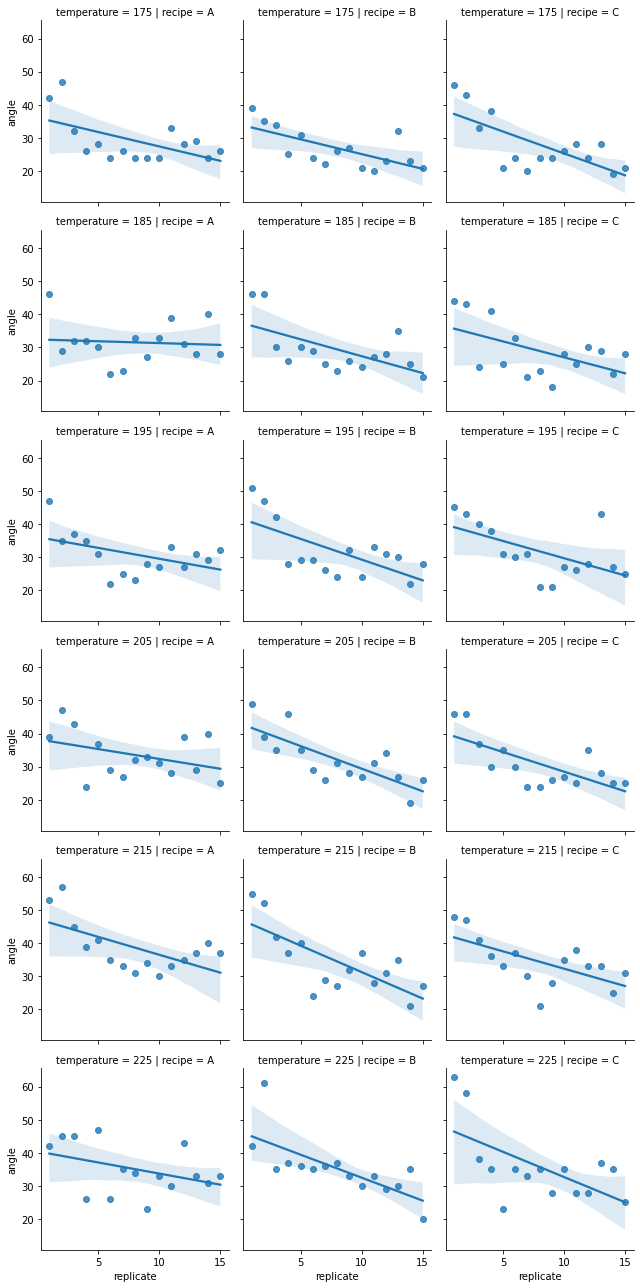

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# sns.pairplot(data=df, hue='recipe')
g = sns.FacetGrid(df, col="recipe",  row="temperature")
g.map(sns.regplot, "replicate", "angle")
plt.show()

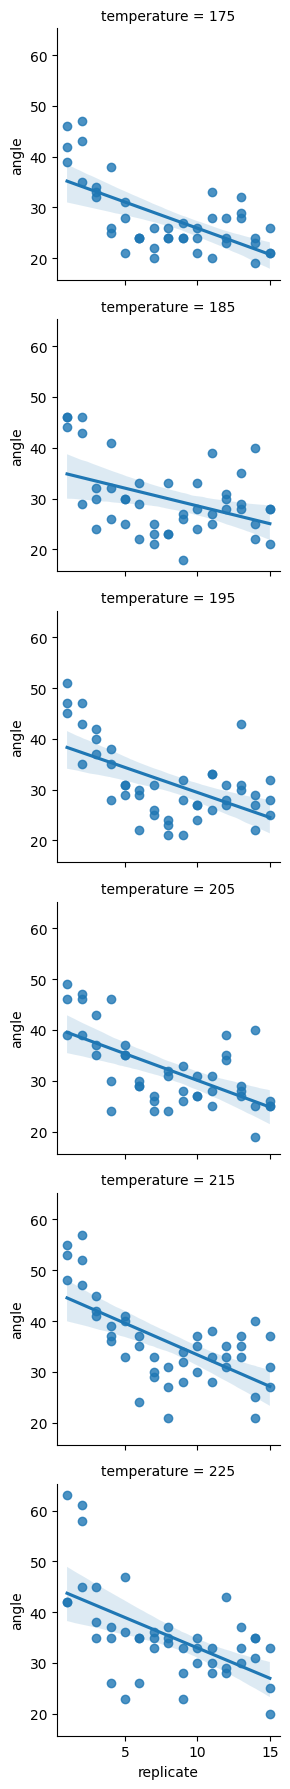

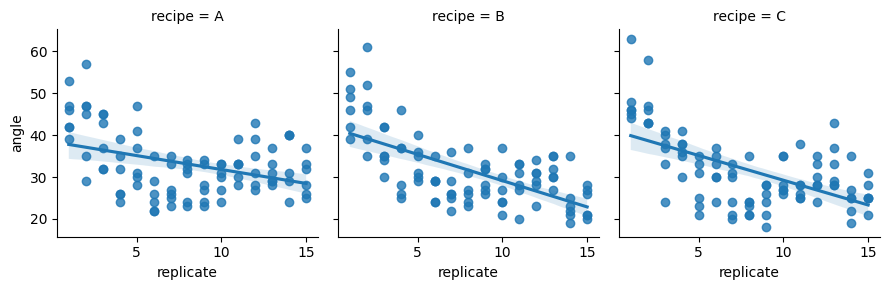

In [5]:
g = sns.FacetGrid(df, row="temperature")
g.map(sns.regplot, "replicate", "angle")
plt.show()

g = sns.FacetGrid(df, col="recipe")
g.map(sns.regplot, "replicate", "angle")
plt.show()

In [6]:
df.groupby('temperature')['angle'].mean()

temperature
175    27.977778
185    29.955556
195    31.422222
205    32.177778
215    35.844444
225    35.355556
Name: angle, dtype: float64

In [8]:
df.groupby(['recipe', 'temperature'])['angle'].mean()

recipe  temperature
A       175            29.133333
        185            31.533333
        195            30.800000
        205            33.533333
        215            38.666667
        225            35.066667
B       175            26.866667
        185            29.400000
        195            31.733333
        205            32.133333
        215            34.466667
        225            35.266667
C       175            27.933333
        185            28.933333
        195            31.733333
        205            30.866667
        215            34.400000
        225            35.733333
Name: angle, dtype: float64

In [9]:
df.groupby(['temperature', 'recipe'])['angle'].mean()

temperature  recipe
175          A         29.133333
             B         26.866667
             C         27.933333
185          A         31.533333
             B         29.400000
             C         28.933333
195          A         30.800000
             B         31.733333
             C         31.733333
205          A         33.533333
             B         32.133333
             C         30.866667
215          A         38.666667
             B         34.466667
             C         34.400000
225          A         35.066667
             B         35.266667
             C         35.733333
Name: angle, dtype: float64

## Conclusions

The higher temperature bakes yielded greater breakage angles, with 215&deg;C showing the highest average angle overall.  The best performing combination is recipe A at 215&deg;C with an average breakage angle of 38.67 degrees. This is about 8% greater than the next best combination of recipe C at 225&deg;C which had an average breakage angle of 35.73 degrees, and 41% greater than the worst combination of recipe B at 175&deg;C which broke at only 26.87 degrees.